In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
raw_data = pd.read_csv('2017EE30515.csv', header=None)
pca_data = pd.read_csv('2017EE30515_pca.csv', header=None)

In [3]:
X_raw = raw_data.iloc[:,:784]/255
t_raw = raw_data.iloc[:,784]

t_raw_oh = np.zeros((len(t_raw),10))
t_raw_oh[np.arange(len(t_raw)),t_raw] = 1

In [4]:
X_pca = pca_data.iloc[:,:25]
t_pca = pca_data.iloc[:,25]

t_pca_oh = np.zeros((len(t_pca),10))
t_pca_oh[np.arange(len(t_pca)),t_pca] = 1

In [5]:
model1 = Sequential()
model1.add(Dense(units=15, activation='relu', input_shape=(25,)))
model1.add(Dense(units=10, activation='softmax'))
#model1.add(Dense(units=10, activation='softmax', input_shape=(25,)))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 550
Trainable params: 550
Non-trainable params: 0
_________________________________________________________________


In [6]:
gd = optimizers.SGD(lr=0.05)
model1.compile(optimizer=gd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(X_pca,t_pca_oh,batch_size=100,epochs=100,verbose=1,validation_split=0.1)

Train on 2700 samples, validate on 300 samples
Epoch 1/100
2700/2700 [==============================] - 2s 767us/step - loss: 2.2319 - acc: 0.2352 - val_loss: 1.8557 - val_acc: 0.3933
Epoch 2/100
2700/2700 [==============================] - 0s 37us/step - loss: 1.6685 - acc: 0.4804 - val_loss: 1.4467 - val_acc: 0.5767
Epoch 3/100
2700/2700 [==============================] - 0s 34us/step - loss: 1.3245 - acc: 0.6130 - val_loss: 1.1859 - val_acc: 0.6567
Epoch 4/100
2700/2700 [==============================] - 0s 34us/step - loss: 1.0976 - acc: 0.6804 - val_loss: 1.0117 - val_acc: 0.7067
Epoch 5/100
2700/2700 [==============================] - 0s 33us/step - loss: 0.9434 - acc: 0.7233 - val_loss: 0.8940 - val_acc: 0.7300
Epoch 6/100
2700/2700 [==============================] - 0s 34us/step - loss: 0.8351 - acc: 0.7526 - val_loss: 0.8110 - val_acc: 0.7467
Epoch 7/100
2700/2700 [==============================] - 0s 33us/step - loss: 0.7556 - acc: 0.7796 - val_loss: 0.7493 - val_acc: 0.7667


2700/2700 [==============================] - 0s 34us/step - loss: 0.2944 - acc: 0.9093 - val_loss: 0.4026 - val_acc: 0.8833
Epoch 61/100
2700/2700 [==============================] - 0s 34us/step - loss: 0.2927 - acc: 0.9104 - val_loss: 0.4017 - val_acc: 0.8833
Epoch 62/100
2700/2700 [==============================] - 0s 52us/step - loss: 0.2910 - acc: 0.9111 - val_loss: 0.3997 - val_acc: 0.8833
Epoch 63/100
2700/2700 [==============================] - 0s 39us/step - loss: 0.2895 - acc: 0.9126 - val_loss: 0.3995 - val_acc: 0.8833
Epoch 64/100
2700/2700 [==============================] - 0s 33us/step - loss: 0.2878 - acc: 0.9119 - val_loss: 0.3979 - val_acc: 0.8833
Epoch 65/100
2700/2700 [==============================] - 0s 33us/step - loss: 0.2864 - acc: 0.9107 - val_loss: 0.3978 - val_acc: 0.8833
Epoch 66/100
2700/2700 [==============================] - 0s 34us/step - loss: 0.2850 - acc: 0.9119 - val_loss: 0.3965 - val_acc: 0.8833
Epoch 67/100
2700/2700 [==============================

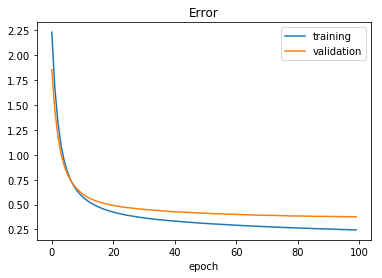

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

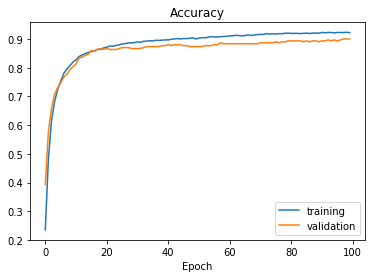

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [9]:
model2 = Sequential()
model2.add(Dense(units=15, activation='relu', input_shape=(784,)))
model2.add(Dense(units=10, activation='softmax'))
#model2.add(Dense(units=10, activation='softmax', input_shape=(784,)))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [10]:
gd = optimizers.SGD(lr=0.05)
model2.compile(optimizer=gd,loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(X_raw,t_raw_oh,batch_size=100,epochs=100,verbose=1,validation_split=0.1)

Train on 2700 samples, validate on 300 samples
Epoch 1/100
2700/2700 [==============================] - 0s 105us/step - loss: 2.1049 - acc: 0.2544 - val_loss: 1.8865 - val_acc: 0.3667
Epoch 2/100
2700/2700 [==============================] - 0s 46us/step - loss: 1.6983 - acc: 0.4437 - val_loss: 1.5385 - val_acc: 0.5600
Epoch 3/100
2700/2700 [==============================] - 0s 44us/step - loss: 1.3386 - acc: 0.6559 - val_loss: 1.1984 - val_acc: 0.7300
Epoch 4/100
2700/2700 [==============================] - 0s 40us/step - loss: 1.0213 - acc: 0.7970 - val_loss: 0.9436 - val_acc: 0.7933
Epoch 5/100
2700/2700 [==============================] - 0s 46us/step - loss: 0.8124 - acc: 0.8304 - val_loss: 0.7968 - val_acc: 0.8233
Epoch 6/100
2700/2700 [==============================] - 0s 47us/step - loss: 0.6855 - acc: 0.8485 - val_loss: 0.7092 - val_acc: 0.8300
Epoch 7/100
2700/2700 [==============================] - 0s 45us/step - loss: 0.6024 - acc: 0.8581 - val_loss: 0.6494 - val_acc: 0.8500


2700/2700 [==============================] - 0s 59us/step - loss: 0.1698 - acc: 0.9574 - val_loss: 0.4411 - val_acc: 0.9033
Epoch 61/100
2700/2700 [==============================] - 0s 61us/step - loss: 0.1673 - acc: 0.9581 - val_loss: 0.4432 - val_acc: 0.8967
Epoch 62/100
2700/2700 [==============================] - 0s 55us/step - loss: 0.1655 - acc: 0.9622 - val_loss: 0.4424 - val_acc: 0.9033
Epoch 63/100
2700/2700 [==============================] - 0s 47us/step - loss: 0.1626 - acc: 0.9585 - val_loss: 0.4416 - val_acc: 0.9033
Epoch 64/100
2700/2700 [==============================] - 0s 55us/step - loss: 0.1604 - acc: 0.9596 - val_loss: 0.4435 - val_acc: 0.9033
Epoch 65/100
2700/2700 [==============================] - 0s 57us/step - loss: 0.1594 - acc: 0.9604 - val_loss: 0.4437 - val_acc: 0.9000
Epoch 66/100
2700/2700 [==============================] - 0s 47us/step - loss: 0.1564 - acc: 0.9633 - val_loss: 0.4447 - val_acc: 0.9033
Epoch 67/100
2700/2700 [==============================

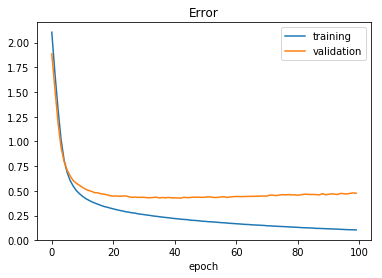

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

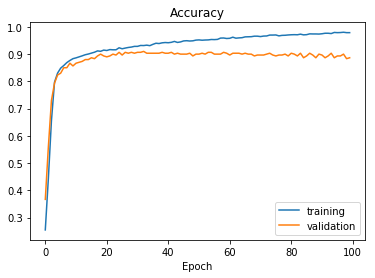

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()